In [3]:
import os
import cv2
import numpy as np

In [60]:
features=[]
target=[]
for x in range(0,43):
    ImagesNamesList=os.listdir("C:/Users/DELL/Downloads/myData" + "/" + str(x) )
    for y in ImagesNamesList:
        Imgarr=cv2.imread("C:/Users/DELL/Downloads/myData" + "/" + str(x) + "/" + y)
        features.append(Imgarr)
        target.append(x)
    print("In Folder", x)

In Folder 0
In Folder 1
In Folder 2
In Folder 3
In Folder 4
In Folder 5
In Folder 6
In Folder 7
In Folder 8
In Folder 9
In Folder 10
In Folder 11
In Folder 12
In Folder 13
In Folder 14
In Folder 15
In Folder 16
In Folder 17
In Folder 18
In Folder 19
In Folder 20
In Folder 21
In Folder 22
In Folder 23
In Folder 24
In Folder 25
In Folder 26
In Folder 27
In Folder 28
In Folder 29
In Folder 30
In Folder 31
In Folder 32
In Folder 33
In Folder 34
In Folder 35
In Folder 36
In Folder 37
In Folder 38
In Folder 39
In Folder 40
In Folder 41
In Folder 42


In [34]:
features=np.array(features)
target=np.array(target)

In [35]:
from sklearn.model_selection import train_test_split
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2)

In [36]:
def preprocessing(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=image/255

    
    
    return image

In [37]:
features_train=np.array(list(map(preprocessing,features_train)))

In [38]:
features_train=features_train.reshape(27839, 32, 32,1)

In [39]:
from keras.preprocessing.image import ImageDataGenerator
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)
dataGen.fit(features_train)

In [40]:
batches=dataGen.flow(features_train,target_train,batch_size=20)
len(batches)


1392

In [41]:
images,labels=next(batches)

In [42]:
images.shape


(20, 32, 32, 1)

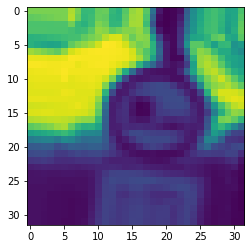

In [43]:
import matplotlib.pyplot as plt
plt.imshow(images[0].reshape(32,32))
plt.show()

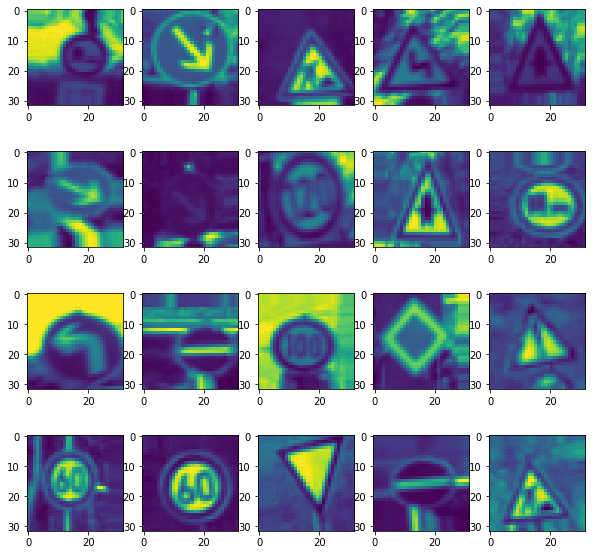

In [44]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.imshow(images[i].reshape(32,32))
plt.show()

In [45]:
from keras.utils import to_categorical
target_train=to_categorical(target_train)
target_train.shape
features_train.shape


(27839, 32, 32, 1)

# STEP1


In [46]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential

In [47]:
model=Sequential()
model.add(Conv2D(60,(3,3),activation="relu",input_shape=(32,32,1)))
model.add(Conv2D(60,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(43,activation="softmax"))

# STEP 2

In [48]:
from keras.optimizers import Adam
model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

# STEP 3

In [49]:
model.fit(dataGen.flow(features_train,target_train,batch_size=20),epochs=10)

Epoch 1/10
1392/1392 [==============================] - 107s 76ms/step - loss: 2.9913 - accuracy: 0.1865
Epoch 2/10
1392/1392 [==============================] - 107s 77ms/step - loss: 0.8415 - accuracy: 0.7418
Epoch 3/10
1392/1392 [==============================] - 109s 78ms/step - loss: 0.4865 - accuracy: 0.8500
Epoch 4/10
1392/1392 [==============================] - 111s 79ms/step - loss: 0.3687 - accuracy: 0.8865
Epoch 5/10
1392/1392 [==============================] - 109s 79ms/step - loss: 0.2982 - accuracy: 0.9134
Epoch 6/10
1392/1392 [==============================] - 116s 83ms/step - loss: 0.2570 - accuracy: 0.9208
Epoch 7/10
1392/1392 [==============================] - 118s 84ms/step - loss: 0.2227 - accuracy: 0.9312
Epoch 8/10
1392/1392 [==============================] - 119s 85ms/step - loss: 0.2017 - accuracy: 0.9393
Epoch 9/10
1392/1392 [==============================] - 117s 84ms/step - loss: 0.1782 - accuracy: 0.9463
Epoch 10/10
1392/1392 [==============================] 

In [50]:
# STEP 4
from keras.models import model_from_json
model_json=model.to_json()
with open("verzeoAITraffic.json","w") as abc:
    abc.write(model_json)
    abc.close()
model.save_weights("verzeoAITrafficWeights.h5")
print("Save the Model")

Save the Model


In [51]:
json_file=open("verzeoAITraffic.json","r")
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("verzeoAITrafficWeights.h5")
print("Loaded Model Sucesssfully")

Loaded Model Sucesssfully


In [52]:
import numpy as np
import cv2

 

def getClassName(classNo):
    if   classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h'
    elif classNo == 5: return 'Speed Limit 80 km/h'
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vechiles'
    elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'End of no passing'
    elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'

In [58]:
capt=cv2.VideoCapture(0)
capt.set(3,640)
capt.set(4,480)
capt.set(10,180)

False

In [54]:
def preprocessing(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=image/255

    
    
    return image

In [57]:
while True:
    message,image=capt.read()
    imagearr=np.asarray(image)
    imagearr=cv2.resize(imagearr,(32,32))
    imagearr=preprocessing(imagearr)
    imagearr=imagearr.reshape(1,32,32,1)
    predictions=loaded_model.predict(imagearr)
    classIndex=loaded_model.predict_classes(imagearr)
    cv2.putText(image,"Class: ",(20,35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    cv2.putText(image,"Probability: ",(20,75),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    probabilityValue=np.amax(predictions)
    if probabilityValue>0.75:
        cv2.putText(image,getClassName(classIndex),(120 , 35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
        cv2.putText(image,str(int(probabilityValue * 100)) + " %",( 200,75),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    cv2.imshow("Model Prediction",image)
    returnedValue=cv2.waitKey(1)
    if returnedValue==ord("s") or returnedValue==ord("S"):
        cv2.destroyAllWindows()
        break

In [59]:
model.predict(features_test[0])

ValueError: in user code:

    C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:239 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (32, 32, 3)
